In [1]:
from fast_rl.core.basic_train import AgentLearner
from fast_rl.agents.dqn import FixedTargetDQN, FixedTargetDQNCallback
from fast_rl.core.train import AgentInterpretation, GroupAgentInterpretation
from fast_rl.core.data_block import MDPDataBunch
from fast_rl.core.agent_core import ExperienceReplay, GreedyEpsilon
from fastai.gen_doc.nbdoc import *

In [2]:
data = MDPDataBunch.from_env('CartPole-v1', render='rgb_array', bs=128)

In [3]:
show_doc(FixedTargetDQN.__init__)

<h4 id="FixedTargetDQN.__init__" class="doc_header"><code>__init__</code><a class="source_link" data-toggle="collapse" data-target="#FixedTargetDQN-__init__-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>__init__</code>(**`data`**:`MDPDataBunch`, **`memory`**=***`None`***, **`tau`**=***`0.01`***, **`copy_over_frequency`**=***`3`***, **\*\*`kwargs`**)

<div class="collapse" id="FixedTargetDQN-__init__-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#FixedTargetDQN-__init__-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>__init__</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Trains an Agent using the Q Learning method on a 2 neural nets. Notes:
    Unlike the base DQN, this is a true reflection of ref [1]. We use 2 models instead of one to allow for
    training the action model more stably.

Args:
    data: Used for size input / output information.

References:
    [1] Mnih, Volodymyr, et al. "Playing atari with deep reinforcement learning."
    arXiv preprint arXiv:1312.5602 (2013). 

In [4]:
show_doc(FixedTargetDQN.target_copy_over)

<h4 id="FixedTargetDQN.target_copy_over" class="doc_header"><code>target_copy_over</code><a class="source_link" data-toggle="collapse" data-target="#FixedTargetDQN-target_copy_over-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>target_copy_over</code>()

<div class="collapse" id="FixedTargetDQN-target_copy_over-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#FixedTargetDQN-target_copy_over-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>target_copy_over</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Updates the target network from calls in the FixedTargetDQNCallback callback.  

The batch size will be defined in the data class because `DataBunches` already require a 
batch size input. This batch size will be used by the model during optimization.

In [5]:
model = FixedTargetDQN(data, memory=ExperienceReplay(memory_size=1000, reduce_ram=True))

In [6]:
show_doc(FixedTargetDQNCallback.__init__)

<h4 id="FixedTargetDQNCallback.__init__" class="doc_header"><code>__init__</code><a class="source_link" data-toggle="collapse" data-target="#FixedTargetDQNCallback-__init__-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>__init__</code>(**`learn`**, **`copy_over_frequency`**=***`3`***)

<div class="collapse" id="FixedTargetDQNCallback-__init__-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#FixedTargetDQNCallback-__init__-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>__init__</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Handles updating the target model in a fixed target DQN. Args:
    learn: Basic Learner.
    copy_over_frequency: For every N iterations we want to update the target model. 

Used by fastai API for training the model.

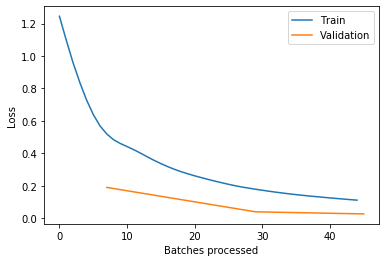

In [7]:
learn = AgentLearner(data, model)
learn.fit(3)
data.close()
learn.recorder.plot_losses()

In [8]:
interp = AgentInterpretation(learn)

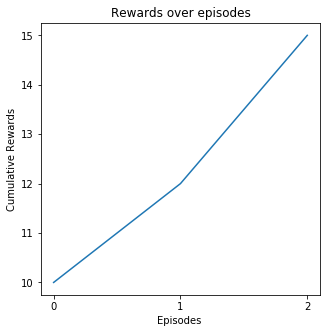

In [9]:
interp.plot_rewards(cumulative=True, per_episode=True, group_name='run')

We can also pipe-line this to truly see how our model actually performs.

In [ ]:
group_interp = GroupAgentInterpretation()
group_interp.add_interpretation(interp)
for i in range(4):
    data = MDPDataBunch.from_env('CartPole-v1', render='rgb_array', bs=128)
    model = FixedTargetDQN(data, memory=ExperienceReplay(memory_size=100000, reduce_ram=True))
    learn = AgentLearner(data, model)
    learn.fit(3)
    interp = AgentInterpretation(learn)
    interp.plot_rewards(cumulative=True, per_episode=True, group_name='run', no_show=True)
    group_interp.add_interpretation(interp)
    data.close()

In [ ]:
group_interp.plot_reward_bounds(per_episode=True)

In [ ]:
[g.analysis for g in group_interp.groups]

In [ ]:
group_interp.append_meta('run1').to_pickle('data/fixed_target_dqn', 'fixed_target_dqn')

In [ ]:
from_pickle_interp = group_interp.from_pickle('data/fixed_target_dqn', 'fixed_target_dqn')

In [ ]:
from_pickle_interp.plot_reward_bounds(per_episode=True)